###   Idea lab project by Julia Bialik, Karolina Marchelewska and Tomasz Słowik :)

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import GetOldTweets3 as got

In [7]:
df = pd.read_csv(r'C:\Users\48570\Desktop\bla\cases-us.csv')

In [8]:
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
2212,2020-04-11,Virginia,51,5077,130
2213,2020-04-11,Washington,53,10224,498
2214,2020-04-11,West Virginia,54,593,6
2215,2020-04-11,Wisconsin,55,3213,141


In [10]:
#delete columns which are of no interest and group by date

del df['state']
del df['fips']
df = df.groupby(df.date).sum()
df.reset_index(inplace = True)
df['Sentiment'] = ''

In [11]:
df

,date,cases,deaths,Sentiment
0,2020-01-21,1,0,
1,2020-01-22,1,0,
2,2020-01-23,1,0,
3,2020-01-24,2,0,
4,2020-01-25,3,0,
...,...,...,...,...
77,2020-04-07,397754,12956,
78,2020-04-08,429319,14803,
79,2020-04-09,463684,16674,
80,2020-04-10,496912,18712,


In [53]:
#VADER sentiment analyzer and function to compute the overall sentiment of a tweet

Anakin = SentimentIntensityAnalyzer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)['compound']
    return(score)

In [54]:
#GetOldTweets3 - function to retrieve 2000 top tweets from one day
def tweets(date1, date2, query):
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(query)\
    .setSince(date1)\
    .setUntil(date2)\
    .setEmoji("unicode")\
    .setTopTweets(True)\
    .setMaxTweets(2000)
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    return tweet

In [55]:
for i in df.index:
    dataa1 = df.iloc[i,0]
    dataa2 = df.iloc[i+1, 0]
    tt = tweets(str(dataa1), str(dataa2), '#Covid19USA')
    score = []
    new = []
    for a in tt:
        sc = sentiment_analyzer_scores(a.text)
        score.append(sc)
    if sum(score) != 0:
        new = sum(score)/len(score)
        df.iloc[i,3] = float(new)
    else:
        df.iloc[i,3] = 0

IndexError: single positional indexer is out-of-bounds

In [56]:
df.drop(df.index[81], inplace = True)

Mean sentiment of: 0.004918283723978505


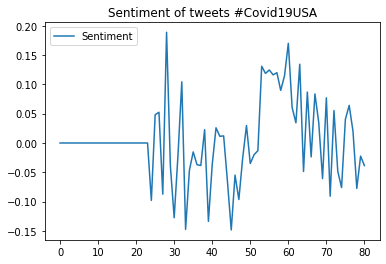

In [57]:
df.plot(y = 'Sentiment', title = 'Sentiment of tweets #Covid19USA')
print( 'Mean sentiment of:', df['Sentiment'].mean())

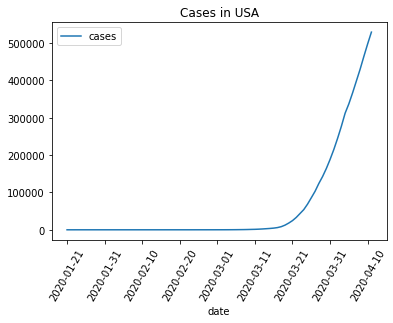

In [16]:
df.plot(y = 'cases', x = 'date', title = 'Cases in USA', rot = 60)

Mean sentiment of: -0.019601371489333465


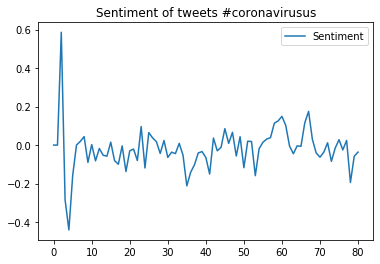

In [68]:
df.plot(y = 'Sentiment', title = 'Sentiment of tweets #coronavirusUS')
print( 'Mean sentiment of:', df['Sentiment'].mean())

Mean sentiment of: -0.09022807653515498


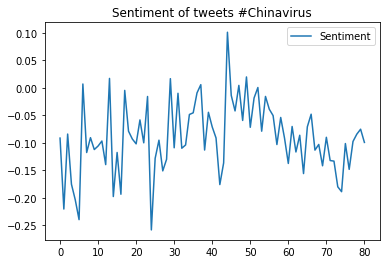

In [76]:
df.plot(y = 'Sentiment', title = 'Sentiment of tweets #Chinavirus')
print( 'Mean sentiment of:', df['Sentiment'].mean())

In [64]:
df = pd.read_csv(r'C:\Users\48570\Desktop\bla\cases-us.csv')
del df['state']
del df['fips']
df = df.groupby(df.date).sum()
df.reset_index(inplace = True)
df['Sentiment'] = ''

In [66]:
for i in df.index:
    dataa1 = df.iloc[i,0]
    dataa2 = df.iloc[i+1, 0]
    tt = tweets(str(dataa1), str(dataa2), '#coronavirusus')
    score = []
    new = []
    for a in tt:
        sc = sentiment_analyzer_scores(a.text)
        score.append(sc)
    if sum(score) != 0:
        new = sum(score)/len(score)
        df.iloc[i,3] = float(new)
    else:
        df.iloc[i,3] = 0
        

IndexError: single positional indexer is out-of-bounds

In [67]:
df.drop(df.index[81], inplace = True)

In [70]:
df = pd.read_csv(r'C:\Users\48570\Desktop\bla\cases-us.csv')
del df['state']
del df['fips']
df = df.groupby(df.date).sum()
df.reset_index(inplace = True)
df['Sentiment'] = ''

In [74]:
for i in df.index:
    dataa1 = df.iloc[i,0]
    dataa2 = df.iloc[i+1, 0]
    tt = tweets(str(dataa1), str(dataa2), '#Chinavirus')
    score = []
    new = []
    for a in tt:
        sc = sentiment_analyzer_scores(a.text)
        score.append(sc)
    if sum(score) != 0:
        new = sum(score)/len(score)
        df.iloc[i,3] = float(new)
    else:
        df.iloc[i,3] = 0
        

IndexError: single positional indexer is out-of-bounds

In [75]:
df.drop(df.index[81], inplace = True)